In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("psparks/instacart-market-basket-analysis")

print("Path to dataset files:", path)

In [3]:
import os
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 2. 각 파일 불러오기
base_path = '/kaggle/input/instacart-market-basket-analysis/'

aisles = pd.read_csv(base_path + 'aisles.csv')
departments = pd.read_csv(base_path + 'departments.csv')
order_products_prior = pd.read_csv(base_path + 'order_products__prior.csv')
order_products_train = pd.read_csv(base_path + 'order_products__train.csv')
orders = pd.read_csv(base_path + 'orders.csv')
products = pd.read_csv(base_path + 'products.csv')

In [7]:
# 3. 데이터 크기 및 형태 확인
print("\n[데이터 크기 및 형태]")
print(f"aisles: {aisles.shape}")
print(f"departments: {departments.shape}")
print(f"order_products_prior: {order_products_prior.shape}")
print(f"order_products_train: {order_products_train.shape}")
print(f"orders: {orders.shape}")
print(f"products: {products.shape}")


[데이터 크기 및 형태]
aisles: (134, 2)
departments: (21, 2)
order_products_prior: (32434489, 4)
order_products_train: (1384617, 4)
orders: (3421083, 7)
products: (49688, 4)


In [9]:
# 4. 주요 통계 및 데이터 크기 확인
print("\n[데이터 크기]")
print(f"주문 수: {orders['order_id'].nunique():,}")
print(f"고객 수: {orders['user_id'].nunique():,}")
print(f"상품 수: {products['product_id'].nunique():,}")
print(f"주문-상품(상세) 수: {order_products_prior.shape[0]:,}")


[데이터 크기]
주문 수: 3,421,083
고객 수: 206,209
상품 수: 49,688
주문-상품(상세) 수: 32,434,489


In [11]:
# orders 테이블의 기본 및 통계 정보
print(orders.info())  # 컬럼별 데이터 타입 및 결측치 확인
print(orders.describe())  # 수치형 컬럼의 기본 통계량

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None
           order_id       user_id  order_number     order_dow  \
count  3.421083e+06  3.421083e+06  3.421083e+06  3.421083e+06   
mean   1.710542e+06  1.029782e+05  1.715486e+01  2.776219e+00   
std    9.875817e+05  5.953372e+04  1.773316e+01  2.046829e+00   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    8.552715e+05  5.139400e+04  5.000000e+00  1.000000e+00   
50%    1.710542e+06  1.026890e+05  1.100000e+01  3.000000e+00   
75%    2.565812e+06  1.543850e+

In [14]:
# orders, products, order_products_prior 예시
print("orders 데이터프레임 정보")
print(orders.info())
print("\nproducts 데이터프레임 정보")
print(products.info())
print("\norder_products_prior 데이터프레임 정보")
print(order_products_prior.info())

orders 데이터프레임 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB
None

products 데이터프레임 정보
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49688 non-null  int64 
 1   product_name   49688 non-null  object
 2   aisle_id       49688 non-null  int64 
 3   department_id  49688 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None

order_products_prior 데이터프레임

In [15]:
print("\norders 결측치 개수")
print(orders.isnull().sum())
print("\nproducts 결측치 개수")
print(products.isnull().sum())
print("\norder_products_prior 결측치 개수")
print(order_products_prior.isnull().sum())


orders 결측치 개수
order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

products 결측치 개수
product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

order_products_prior 결측치 개수
order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


In [16]:
# 결측치 비율 확인
print(orders.isnull().mean())  # 각 컬럼별 결측치 비율



order_id                  0.000000
user_id                   0.000000
eval_set                  0.000000
order_number              0.000000
order_dow                 0.000000
order_hour_of_day         0.000000
days_since_prior_order    0.060276
dtype: float64


In [31]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("idealm99/fontnanum")

print("Path to dataset files:", path)

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import glob
import os

import matplotlib.font_manager as fm

font_path = "/kaggle/input/fontnanum/나눔 글꼴/나눔고딕/NanumFontSetup_OTF_GOTHIC/NanumGothic.otf"
font_name = fm.FontProperties(fname=font_path).get_name()
print(font_name)  # 실제 폰트 이름 출력
import matplotlib as mpl
mpl.rc('font', family=font_name)

import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False  # 마이너스(-) 깨짐 방지


Path to dataset files: /kaggle/input/fontnanum
NanumGothicOTF


Text(0, 0.5, '주문 수')

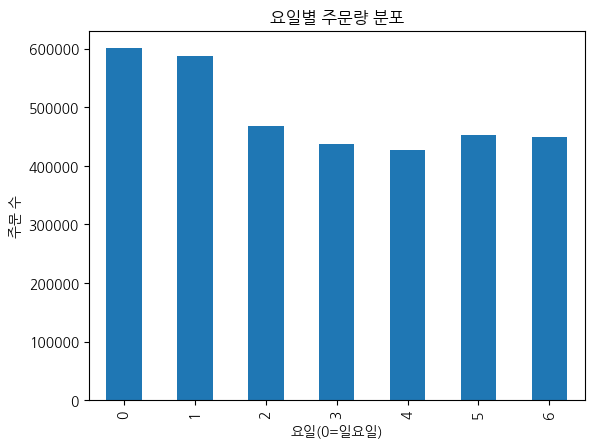

In [32]:
# 요일별 주문량 분포
orders['order_dow'].value_counts().sort_index().plot(kind='bar')
plt.title('요일별 주문량 분포')
plt.xlabel('요일(0=일요일)')
plt.ylabel('주문 수')


Text(0, 0.5, '주문 수')

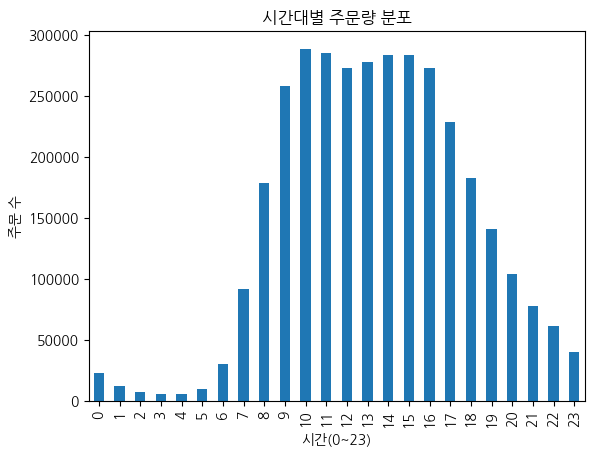

In [33]:
# 시간대별 주문량 분포
orders['order_hour_of_day'].value_counts().sort_index().plot(kind='bar')
plt.title('시간대별 주문량 분포')
plt.xlabel('시간(0~23)')
plt.ylabel('주문 수')

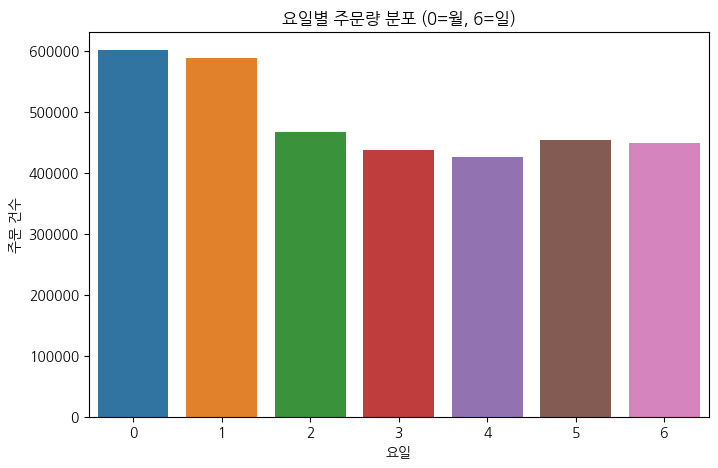

In [62]:
# 요일별 주문량 분포 시각화 (예시)
plt.figure(figsize=(8,5))
sns.countplot(x='order_dow', data=orders)
plt.title('요일별 주문량 분포 (0=월, 6=일)')
plt.xlabel('요일')
plt.ylabel('주문 건수')
plt.show()

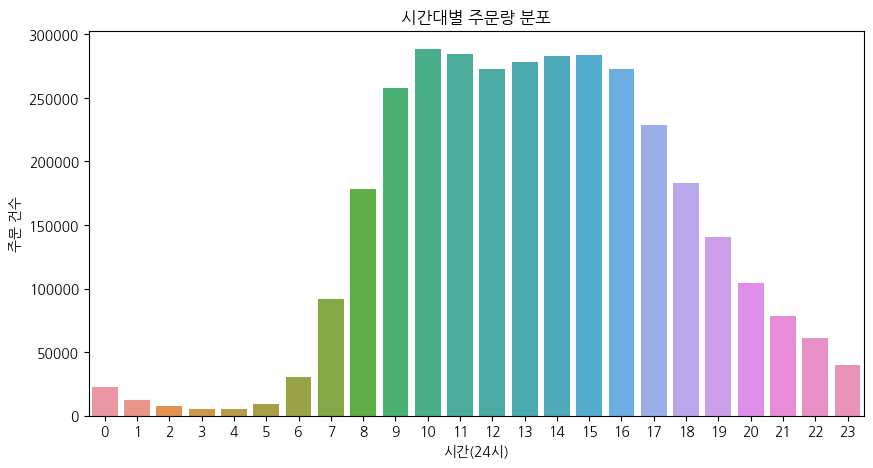

In [63]:
# 시간대별 주문량 분포 시각화 (예시)
plt.figure(figsize=(10,5))
sns.countplot(x='order_hour_of_day', data=orders)
plt.title('시간대별 주문량 분포')
plt.xlabel('시간(24시)')
plt.ylabel('주문 건수')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


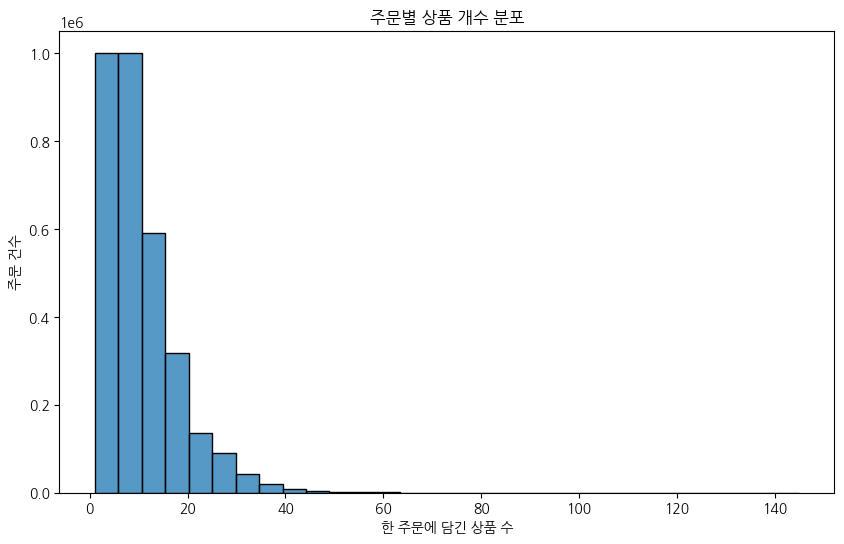

In [35]:
# 5. 주문별 상품 개수 분포 시각화 (예시)
order_cnt = order_products_prior.groupby('order_id').size()
plt.figure(figsize=(10,6))
sns.histplot(order_cnt, bins=30, kde=False)
plt.title('주문별 상품 개수 분포')
plt.xlabel('한 주문에 담긴 상품 수')
plt.ylabel('주문 건수')
plt.show()

In [36]:
# 재구매율 계산
reorder_rate = order_products_prior['reordered'].mean()
print(f"재구매율: {reorder_rate:.2%}")

재구매율: 58.97%


In [37]:
# 한 주문당 평균 상품 수
order_size = order_products_prior.groupby('order_id').size()
print(order_size.describe())

count    3.214874e+06
mean     1.008888e+01
std      7.525398e+00
min      1.000000e+00
25%      5.000000e+00
50%      8.000000e+00
75%      1.400000e+01
max      1.450000e+02
dtype: float64


In [38]:
print("orders 중복 행 개수:", orders.duplicated().sum())
print("products 중복 행 개수:", products.duplicated().sum())
print("order_products_prior 중복 행 개수:", order_products_prior.duplicated().sum())


orders 중복 행 개수: 0
products 중복 행 개수: 0
order_products_prior 중복 행 개수: 0


In [39]:
print("orders의 eval_set 고유값:", orders['eval_set'].unique())
print("products의 aisle_id 고유값 개수:", products['aisle_id'].nunique())
print("products의 department_id 고유값 개수:", products['department_id'].nunique())


orders의 eval_set 고유값: ['prior' 'train' 'test']
products의 aisle_id 고유값 개수: 134
products의 department_id 고유값 개수: 21


In [45]:
# 누락값은 0으로 채우고 정렬
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(0)

# 누적 일수 계산 (고객별로 주문 순서대로 정렬 후 누적)
orders['days_cumsum'] = orders.sort_values(['user_id', 'order_number']) \
                              .groupby('user_id')['days_since_prior_order'].cumsum()

orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,days_cumsum
0,2539329,1,prior,1,2,8,0.0,0.0
1,2398795,1,prior,2,3,7,15.0,15.0
2,473747,1,prior,3,3,12,21.0,36.0
3,2254736,1,prior,4,4,7,29.0,65.0
4,431534,1,prior,5,4,15,28.0,93.0
...,...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0,155.0
3421079,1854736,206209,prior,11,4,10,30.0,185.0
3421080,626363,206209,prior,12,1,12,18.0,203.0
3421081,2977660,206209,prior,13,1,12,7.0,210.0


In [46]:
# 인기 상품 Top 10
top_products = order_products_prior[['product_id']].value_counts().head(10)
print(top_products)

product_id
24852         472565
13176         379450
21137         264683
21903         241921
47209         213584
47766         176815
47626         152657
16797         142951
26209         140627
27845         137905
Name: count, dtype: int64


In [48]:
# 상품명 결합
top_products_df = top_products.reset_index()
top_products_df.columns = ['product_id', 'count']
top_products_with_names = top_products_df.merge(products, on='product_id')
print(top_products_with_names[['product_name', 'product_id', 'count']])


             product_name  product_id   count
0                  Banana       24852  472565
1  Bag of Organic Bananas       13176  379450
2    Organic Strawberries       21137  264683
3    Organic Baby Spinach       21903  241921
4    Organic Hass Avocado       47209  213584
5         Organic Avocado       47766  176815
6             Large Lemon       47626  152657
7            Strawberries       16797  142951
8                   Limes       26209  140627
9      Organic Whole Milk       27845  137905


In [51]:
# 1. 고객별 전체 주문 이력
user_orders = orders[['user_id', 'order_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']]
user_orders

,user_id,order_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1,2539329,1,2,8,0.0
1,1,2398795,2,3,7,15.0
2,1,473747,3,3,12,21.0
3,1,2254736,4,4,7,29.0
4,1,431534,5,4,15,28.0
...,...,...,...,...,...,...
3421078,206209,2266710,10,5,18,29.0
3421079,206209,1854736,11,4,10,30.0
3421080,206209,626363,12,1,12,18.0
3421081,206209,2977660,13,1,12,7.0


In [52]:
# 2. 주문별 상품 정보 결합
order_products = order_products_prior.merge(user_orders, on='order_id')
order_products

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2,33120,1,1,202279,3,5,9,8.0
1,2,28985,2,1,202279,3,5,9,8.0
2,2,9327,3,0,202279,3,5,9,8.0
3,2,45918,4,1,202279,3,5,9,8.0
4,2,30035,5,0,202279,3,5,9,8.0
...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,25247,24,2,6,21.0
32434485,3421083,11352,7,0,25247,24,2,6,21.0
32434486,3421083,4600,8,0,25247,24,2,6,21.0
32434487,3421083,24852,9,1,25247,24,2,6,21.0


In [53]:
# 3. 상품-카테고리 정보 결합
order_products = order_products.merge(products, on='product_id')
order_products = order_products.merge(aisles, on='aisle_id')
order_products = order_products.merge(departments, on='department_id')
order_products

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,25247,24,2,6,21.0,Free & Clear Natural Dishwasher Detergent,74,17,dish detergents,household
32434485,3421083,11352,7,0,25247,24,2,6,21.0,Organic Mini Sandwich Crackers Peanut Butter,78,19,crackers,snacks
32434486,3421083,4600,8,0,25247,24,2,6,21.0,All Natural French Toast Sticks,52,1,frozen breakfast,frozen
32434487,3421083,24852,9,1,25247,24,2,6,21.0,Banana,24,4,fresh fruits,produce


In [66]:
# 4. 고객별 마지막 주문 시점 찾기
last_orders = orders.groupby('user_id')['order_number'].max().reset_index()
last_orders = last_orders.merge(orders, on=['user_id', 'order_number'])

In [71]:
# days_since_prior_order 기준 내림차순 정렬
sorted_orders = orders.sort_values(by='days_since_prior_order', ascending=False)
sorted_orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,days_cumsum
9,2550362,1,prior,10,4,8,30.0,176.0
23,3268552,2,prior,13,4,11,30.0,185.0
3421082,272231,206209,train,14,6,14,30.0,240.0
3421079,1854736,206209,prior,11,4,10,30.0,185.0
21,1402090,2,prior,11,1,10,30.0,127.0
...,...,...,...,...,...,...,...,...
1199740,303295,72117,prior,1,1,9,0.0,0.0
3420985,648225,206206,prior,52,0,19,0.0,158.0
3420991,2475308,206206,prior,58,0,15,0.0,193.0
3421001,1043943,206206,test,68,0,20,0.0,249.0


In [73]:
# 5. 이탈 고객 판별 (예: 마지막 주문 후 20일 이상 재주문 없음)
churn_threshold = 20
last_orders['is_churned'] = last_orders['days_since_prior_order'] > churn_threshold

In [78]:
last_orders

,user_id,order_number,order_id,eval_set,order_dow,order_hour_of_day,days_since_prior_order,days_cumsum,is_churned
0,1,11,1187899,train,4,8,14.0,190.0,False
1,2,15,1492625,train,1,11,30.0,228.0,True
2,3,13,2774568,test,5,15,11.0,144.0,False
3,4,6,329954,test,3,12,30.0,85.0,True
4,5,5,2196797,train,0,11,6.0,46.0,False
...,...,...,...,...,...,...,...,...,...
206204,206205,4,1716008,train,1,16,10.0,50.0,False
206205,206206,68,1043943,test,0,20,0.0,249.0,False
206206,206207,17,2821651,test,2,13,14.0,229.0,False
206207,206208,50,803273,test,5,11,4.0,361.0,False


In [79]:
# 6. 이탈 고객 비율 계산
churn_rate = last_orders['is_churned'].mean()
print(f"이탈 고객 비율: {churn_rate:.2%}")

이탈 고객 비율: 41.63%


In [81]:
# 7. 이탈 고객의 상품/카테고리 특성 분석
churned_users = last_orders[last_orders['is_churned']]['user_id']
churned_orders = order_products[order_products['user_id'].isin(churned_users)]

In [82]:
churned_orders

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,202279,3,5,9,8.0,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,202279,3,5,9,8.0,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,202279,3,5,9,8.0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,202279,3,5,9,8.0,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,202279,3,5,9,8.0,Natural Sweetener,17,13,baking ingredients,pantry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32434467,3421081,32299,3,0,117076,1,3,11,0.0,Dijon Mustard,72,13,condiments,pantry
32434468,3421081,3060,4,0,117076,1,3,11,0.0,Pepper Jack Cheese Slices,21,16,packaged cheese,dairy eggs
32434469,3421081,20539,5,0,117076,1,3,11,0.0,Healthy Kids Chicken Alphabet Condensed Soup,69,15,soup broth bouillon,canned goods
32434470,3421081,35221,6,0,117076,1,3,11,0.0,Lime Sparkling Water,115,7,water seltzer sparkling water,beverages


In [83]:
churned_orders['department'].value_counts()

department
produce            2173147
dairy eggs         1262836
snacks              692853
beverages           654899
frozen              589958
pantry              479660
bakery              287754
canned goods        282093
deli                261933
dry goods pasta     230031
household           203256
meat seafood        182284
breakfast           174680
personal care       117239
babies               84559
international        68671
alcohol              47830
pets                 26649
missing               9207
other                 8667
bulk                  6807
Name: count, dtype: int64

In [84]:
# 8. 기준일별 이탈율 추이
churn_rates = {}
for threshold in range(1, 31):  # 1~30일 기준
    last_orders['is_churned'] = last_orders['days_since_prior_order'] >= threshold
    churn_rate = last_orders['is_churned'].mean()
    churn_rates[threshold] = churn_rate

# 결과를 데이터프레임으로 정리
churn_rates_df = pd.DataFrame(list(churn_rates.items()), columns=['churn_threshold', 'churn_rate'])
print(churn_rates_df)


    churn_threshold  churn_rate
0                 1    0.983905
1                 2    0.963362
2                 3    0.936773
3                 4    0.906027
4                 5    0.871073
5                 6    0.833189
6                 7    0.785819
7                 8    0.715856
8                 9    0.674840
9                10    0.645724
10               11    0.621534
11               12    0.599343
12               13    0.576115
13               14    0.549690
14               15    0.514939
15               16    0.492166
16               17    0.475105
17               18    0.460732
18               19    0.447003
19               20    0.432571
20               21    0.416306
21               22    0.395899
22               23    0.381899
23               24    0.370959
24               25    0.361221
25               26    0.351958
26               27    0.342764
27               28    0.331436
28               29    0.317159
29               30    0.306417


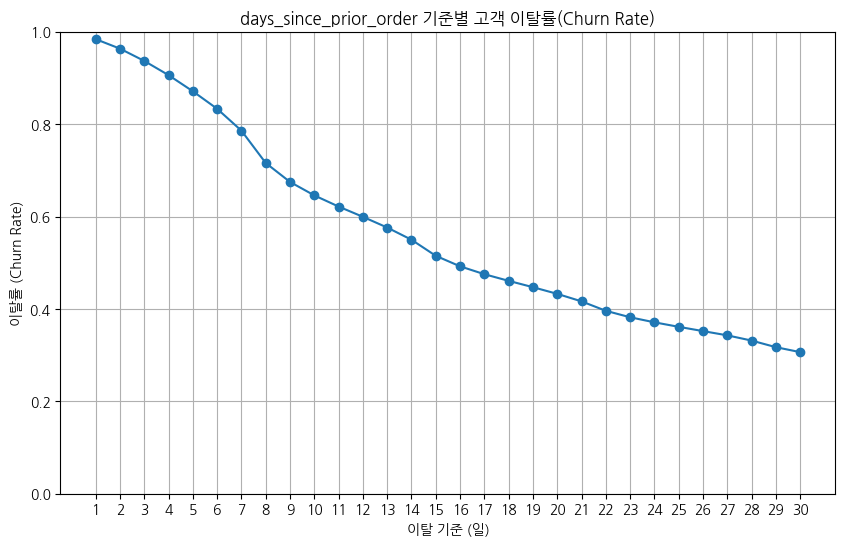

In [85]:
plt.figure(figsize=(10, 6))
plt.plot(churn_rates_df['churn_threshold'], churn_rates_df['churn_rate'], marker='o', linestyle='-')
plt.title('days_since_prior_order 기준별 고객 이탈률(Churn Rate)')
plt.xlabel('이탈 기준 (일)')
plt.ylabel('이탈률 (Churn Rate)')
plt.grid(True)
plt.xticks(range(1, 31))
plt.ylim(0, 1)
plt.show()

In [88]:
# 9. 재주문 고객 vs 1회 구매 고객의 이탈율

# 9-1 고객별 재주문 여부 집계
# order_products_prior: 주문-상품 매핑 데이터
# orders: 주문 정보
# 재주문 경험이 있는 고객(user_id) 추출
reordered_users = order_products_prior[order_products_prior['reordered'] == 1]['order_id'].unique()
reordered_user_ids = orders[orders['order_id'].isin(reordered_users)]['user_id'].unique()

# 전체 고객 집합
all_user_ids = orders['user_id'].unique()

# 재주문 없는 고객 집합
non_reordered_user_ids = set(all_user_ids) - set(reordered_user_ids)

# 9-2 고객별 마지막 주문 이탈 여부 판정
last_orders = orders.groupby('user_id')['order_number'].max().reset_index()
last_orders = last_orders.merge(orders, on=['user_id', 'order_number'])
# 이탈 기준(예: 30일)
churn_threshold = 30
last_orders['is_churned'] = last_orders['days_since_prior_order'] >= churn_threshold

# 9-3 그룹별 이탈률 계산
# 재주문 고객
reordered_last_orders = last_orders[last_orders['user_id'].isin(reordered_user_ids)]
reordered_churn_rate = reordered_last_orders['is_churned'].mean()

# 비재주문 고객
non_reordered_last_orders = last_orders[last_orders['user_id'].isin(non_reordered_user_ids)]
non_reordered_churn_rate = non_reordered_last_orders['is_churned'].mean()

print(f"재주문 고객 이탈률: {reordered_churn_rate:.2%}")
print(f"1회 구매 고객 이탈률: {non_reordered_churn_rate:.2%}")


재주문 고객 이탈률: 30.34%
1회 구매 고객 이탈률: 50.57%


In [92]:
# 10. 고객 주문 회수별 이탈율

# 1. 고객별 마지막 주문 정보 추출
last_orders = orders.groupby('user_id')['order_number'].max().reset_index()
last_orders = last_orders.merge(orders, on=['user_id', 'order_number'])

# 2. 이탈 여부 판정 (30일 이상 미주문 시 이탈)
churn_threshold = 30
last_orders['is_churned'] = last_orders['days_since_prior_order'] >= churn_threshold

# 3. 주문 횟수별 그룹화 (5회 이상은 '5회 이상'으로 통합)
last_orders['order_count_group'] = np.where(
    last_orders['order_number'] >= 5, '5회 이상', last_orders['order_number'].astype(str) + '회'
)

# 4. 그룹별 이탈률 계산
churn_by_group = last_orders.groupby('order_count_group')['is_churned'].mean().reset_index()

# 5. 정렬용 숫자 컬럼 생성 후 정렬
churn_by_group['sort_key'] = churn_by_group['order_count_group'].str.replace('회 이상', '5').str.extract(r'(\d+)')[0].astype(int)
churn_by_group = churn_by_group.sort_values('sort_key').drop(columns='sort_key')

print(churn_by_group)

  order_count_group  is_churned
0                4회    0.482531
1             5회 이상    0.283235
  order_count_group  is_churned
0                4회    0.482531
1             5회 이상    0.283235
